Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Madison E. Chester"
COLLABORATORS = ""

---

In [2]:
## import libraries needed
## make sure you run this code first!

library(testthat)
library(digest)
library(stringr)
library(dplyr)


Attaching package: ‘dplyr’


The following object is masked from ‘package:testthat’:

    matches


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## Question 1

Let's begin with some plots in base R, and we'll use the `ChickWeight` dataset to reproduce several plots (explore and get a feel for `ChickWeight` using `head()`, `str`, `?ChickWeight`, etc).  For this first question, your task is to make a **scatterplot** of `weight` versus `Time`, *and* color points by `Diet`.  *Include appropriate axis labels, main title, and a legend.* You may wish to add a small jitter in `Time`, as well as use a custom colormap with an `alpha < 1`.  You should reproduce, in essence, the following plot:

![](chick_scatter.png)

Note that Questions 1-4 will be graded manually. Your rubric is:
1. 3 points - reproduce essential elements of the plot, e.g. points on scatter plot, boxes in boxplot, bars in a barplot. Includes 1 point for proper coloring if this is asked for.
2. 1 point - proper general aesthetics: appropriate x and y labels, title, and appropriate legend, if applicable.

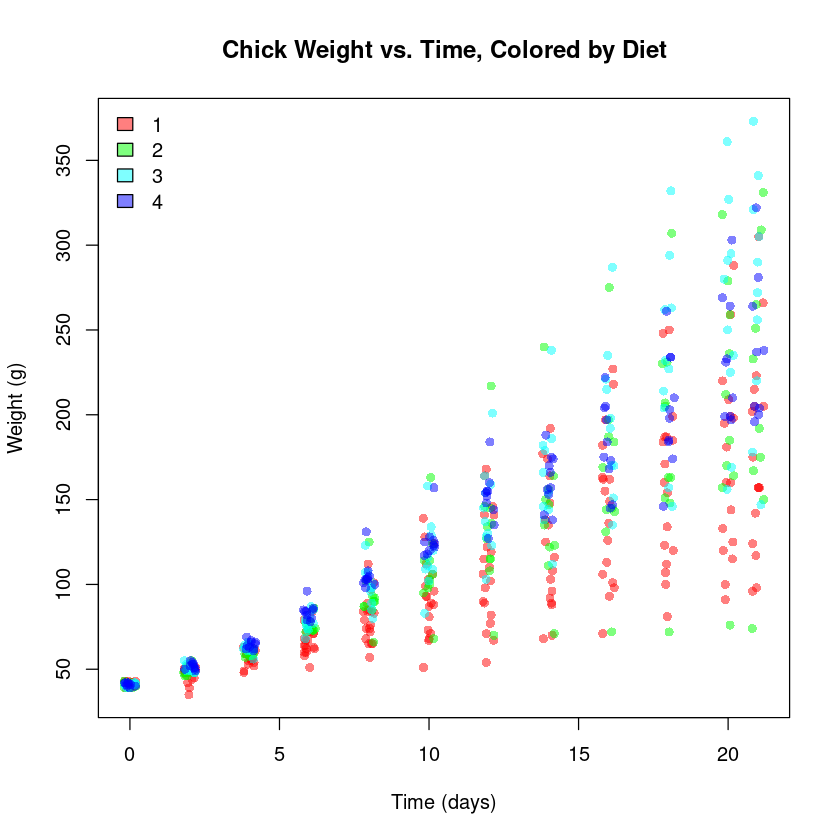

In [3]:
x = ChickWeight$Time
x_jitter = jitter(x)
y = ChickWeight$weight
palette(c("red", "green", "cyan", "blue"))
palette(adjustcolor(palette(), 0.5))
plot(x_jitter,y,pch=16, xlab = "Time (days)", ylab = "Weight (g)", main = "Chick Weight vs. Time, Colored by Diet", 
    col = ChickWeight$Diet)
legend("topleft", legend = unique(ChickWeight$Diet), fill = unique(ChickWeight$Diet), bty = "n")

## Question 2

Now, still using the `ChickWeight` dataframe, construct a **boxplot** that gives a box-and-whisker plot for `weight` at each time point.  That is, reproduce the following plot (except you may use a uniform fill color for your boxplots):

![](chick_boxplots.png)

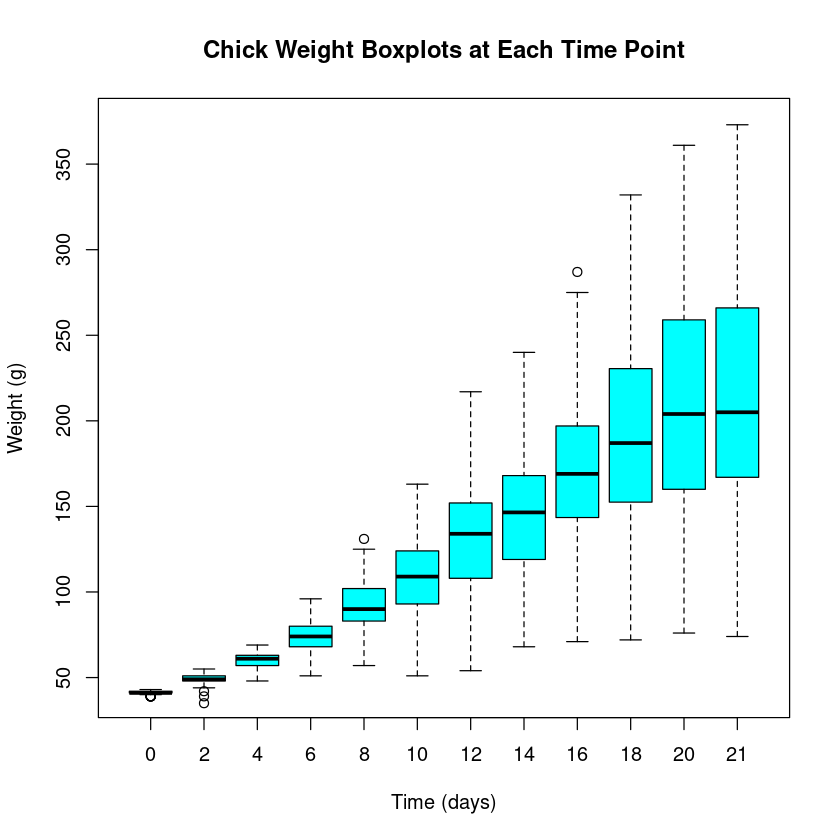

In [4]:
boxplot(ChickWeight$weight ~ ChickWeight$Time, xlab = "Time (days)", ylab = "Weight (g)", main = "Chick Weight Boxplots at Each Time Point",
        ylim = c(40,375), col = "cyan")

## Question 3

Again, using the `ChickWeight` dataframe, make a histogram of `weight` values *at the final time point* (i.e., `Time = 21`). Also, use a custom RGB fill color that is a pretty light blue. So, reproduce, in essence, the following histogram:

![](chick_hist.png)

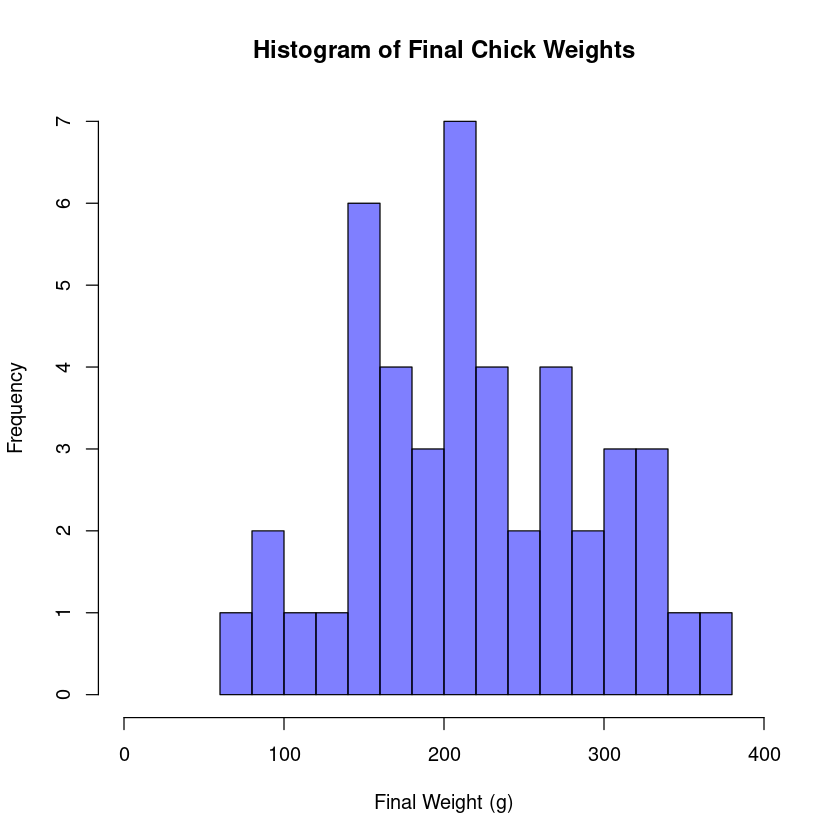

In [5]:
hist(ChickWeight$weight[ChickWeight$Time == 21], breaks = 16, xlab = "Final Weight (g)", ylab = "Frequency", main = "Histogram of Final Chick Weights",
     xlim = c(0,400), ylim = c(0,7), col = rgb(0, 0, 1, 0.5))

## Question 4

Make one final plot using the `ChickWeight` dataframe: Determine the mean *final* weight for each Diet group (the `tapply` function is handy for this), as well as the standard deviation.  Plot the mean weights as a bar plot, and the standard deviations as +/- error bars (you may find the `arrows` functions useful).  In essence, reproduce the following plot:

![](chick_bars.png)

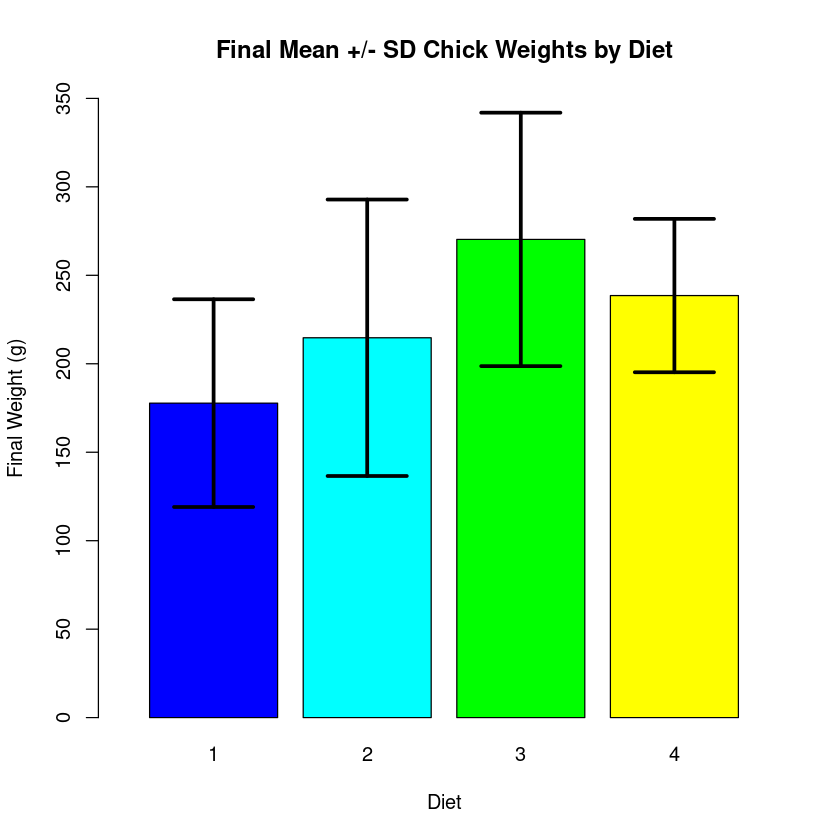

In [6]:
means = tapply(ChickWeight$weight[ChickWeight$Time == 21],ChickWeight$Diet[ChickWeight$Time == 21],mean)
sds = tapply(ChickWeight$weight[ChickWeight$Time == 21],ChickWeight$Diet[ChickWeight$Time == 21],sd)
xx = barplot(means, xlab = "Diet", ylab = "Final Weight (g)", main = "Final Mean +/- SD Chick Weights by Diet", xlim = c(0,5),
        ylim = c(0,350), col = c("blue", "cyan", "green", "yellow"))
arrows(xx, means + sds, xx, means - sds, angle = 90, code = 3, lwd = 3, length = .33)

## Question 5

Create an R function `all_heads()` that returns the probability that you get all heads, out of `n` coin tosses, where `p` (in range `[0,1]`) is the probability that you get a head on a single toss (i.e., it is not necessarily a fair coin).  Encode your two input parameters as:

1. `n` - number of tosses; *give it a default value of 10*
2. `p` - probability of heads; *give it a default value of 0.5*

Recall that repeated trials that are strictly successes or failures are referred to as Bernoulli Trials, and the distribution of outcomes can be described by a binomial random variable.

Here some examples of what your function should return:

`all_heads(92, .5)` <br>
`2.019484e-28`

`all_heads(10, .7)` <br>
`0.02824752`

`all_heads()` <br>
`0.0009765625`

In [7]:
all_heads = function(n=10,p=0.5) {
    return (dbinom(n,n,p))
}

In [8]:
# Do some visible checks

if (test_that(desc="", code={
    expect_equal(abs(all_heads(5, .8) - 0.32768) < 1e-3, TRUE)
    }) != TRUE) stop("Sorry, wrong output")

if (test_that(desc="", code={
    expect_equal(abs(all_heads(15, .2) - 3.2768e-11) < 1e-3, TRUE)
    }) != TRUE) stop("Sorry, wrong output")

Test passed 🌈
Test passed 🎊


In [9]:
# Do hidden tests


## Question 6

Create a function called  `convTemp`, which converts temperature from one of the units - Fahrenheit, Celsius or Kelvin, to another from this list. Your function should have 3 input parameters:

* `x` - which is a vector of (real) numbers 

* `from` - which is a character parameter, having possible values `"C"` (default), `"F"`, or `"K"`

* `to` - which is a character parameter, having possible values `"F"` (default), `"C"`, or `"K"`

Recall that if a temperature has value $F$ in Fahrenheits, $C$ in Celsius and $K$ in Kelvin, then 
\begin{align}
F &= \frac{9}{5}\cdot C + 32 \nonumber \\
K &= C + 273.15 \nonumber 
\end{align}


If `from` and `to` happen to be the same units (i.e. the same character variables from the set {`"C"`, `"F"` `"K"`}), then your function should return the same vector as the input vector, but should previously print out the `warning`, which warns a user that these two are the same (so the function is not useful in that case). Please use the following command for the warning (__**do not change this command, not even a single character!**__)

`warning("Your 'from' parameter is the same as your 'to' parameter!")`

Here are some examples of what your function should return.

`convTemp(c(-10,0,10))` <br>
`14 32 50`

`convTemp(c(35,40,45), from="F", to="K")` <br>
`274.8167 277.5944 280.3722`

`convTemp(20:22, from="C", to="F")` <br>
`68.0 69.8 71.6`


In [10]:
convTemp = function(x,from = "C",to = "F") {
    if(from == "C" & to == "F"){
        return((x*9/5)+32)
    }
    else if(from == "C" & to == "K"){
        return(x+273.15)
    }
    else if(from == "F" & to == "C"){
        return((x-32)*5/9)
    }
    else if(from == "F" & to == "K"){
        return(((x-32)*5/9)+273.15)
    }
    else if(from == "K" & to == "C"){
        return(x-273.15)
    }
    else if(from == "K" & to == "F"){
        return(((x-273.15)*9/5)+32)
    }
    else if((from=="C" & to=="C") | (from=="F" & to=="F") | (from=="K" & to=="K")){
        print(warning("Your 'from' parameter is the same as your 'to' parameter!"))
        return(x)
    }
}

In [11]:
## Check conversion from default C to default F

if (test_that(desc="default Celsius to default Fahrenheight", code={
    expect_equal(convTemp(c(20,30)), c(68,86)) 
    }) != TRUE)  stop("Sorry, wrong conversion from default C to default F!")


Test passed 🎉


In [12]:
## check conversion from F to C

if (test_that(desc="from Fahrenheit to Celsius", code={
    expect_equal(convTemp(c(32,50,104),from="F", to="C"), c(0,10,40)) 
        }) != TRUE) stop("Sorry wrong conversion from F to C")



Test passed 🥳


In [13]:
## check conversion from default C to K, and from F to K (to 4 decimal places)

if (test_that(desc="from default C to K",code={
         expect_equal(norm(convTemp(c(16,30),to="K") - c(289.15,303.15),type="2") < 1e-4, T) 
         }) != TRUE)  stop("Sorry, wrong conversion from C to K!")


if (test_that(desc="", code={
    expect_equal(norm(
        convTemp(c(35,40,45), from="F", to="K") - c(274.816666667,277.59444444,280.37222222),type="2") < 1e-4, TRUE)
    }) != TRUE) stop("Sorry, wrong conversion from F to K")



Test passed 🥇
Test passed 🥇


In [14]:
## check some conversions (hidden tests)



In [15]:
## check some conversions (hidden tests)



In [16]:
## check some conversions (hidden tests)


## Question 7

Create an R function `pwfun()`, which computes values of the piece-wise (mathematical) function $\text{pwfun}$ defined in the following way:

$$\text{pwfun}(x) = \begin{cases}
-2 x - 2 &, \hspace{1.1cm} x<-1 \\
\hspace{.5cm} 0 &, -1\leq x \leq 1 \\
x^2 - 1 &, \hspace{0.3cm} 1 < x
\end{cases}$$

Its graph is as follows. <br>

 <img src="hw2pic1.jpg" height="300" width="300"> 
 
Your R function `pwfun()` should also accept `x` as a vector of arbitrary length and return vector of the same length with entries defined as values of the mathematical function $\text{pwfun}$, evaluated at the corresponding entries of vector `x`.

Here are some input vectors and what you should get as a corresponding output. 

`pwfun(-1)` <br> 
`0`

`pwfun(c(-2, 0.5, 3))` <br>
`2 0 8`

`x = c(-3, -2, -1, 0 , 1, 2, 3.2)` <br> 
`pwfun(x)` <br>
`4 2 0 0 0 3 9.24`

<br>

Hint: 
- Obviously, one way to solve this is using `if-elseif-else` statment. Apart from that, you can also take a look at the R function `ifelse()`, which you could call twice. 


- Be careful: because R has assignment operator `<-`, code lines  `a < -1` and `a <-1` do **NOT** have the same meaning! <br>
While `a < -1` checks whether variable `a` is less than -1, <br>
`a <-1` means the same as `a <- 1`, which is assigning the value 1 to the variable `a`.
   




In [17]:
pwfun = function(x) {
    ifelse(x >= -1 & x <= 1, 0, ifelse(x < -1, -2*x - 2, x^2 - 1))
}

In [18]:
# check whether pwfun(x) is a vector of appropriate length

if (test_that(desc="", code={
    expect_equal(length(pwfun(-3)), 1)
    }) != TRUE) stop("Sorry, pwfun(-3) should be a vector of length 1")

if (test_that(desc="", code={
    expect_equal(length(pwfun(-3)), 1)
    }) != TRUE) stop("Sorry, pwfun(c(-3,6)) should be a vector of length 1")

if (test_that(desc="", code={
    expect_equal(length(pwfun(c(-3,1,-6,12,4))), 5)
    }) != TRUE) stop("Sorry, pwfun(c(-3,1,-6,12,4)) should be a vector of length 5")

Test passed 🎊
Test passed 🎉
Test passed 🥇


In [19]:
# check whether pwfun(x) is correct for several vectors x

if (test_that(desc="", code={
    expect_equal(pwfun(-1), 0)
    }) != TRUE) stop("Sorry, pwfun(-1) should be 0")


if (test_that(desc="", code={
    expect_equal(pwfun(7), 
                 48)
    }) != TRUE) stop("Sorry, pwfun(7) should be 48")

if (test_that(desc="", code={
    expect_equal(pwfun(c(-2, 0.5, 3)), c(2,0,8))
    }) != TRUE) stop("Sorry, wrong answer")


if (test_that(desc="", code={
    expect_equal(pwfun(c(-3,-2,-1,0,1,2,3.2)), c(4, 2, 0, 0, 0, 3, 9.24))
    }) != TRUE) stop("Sorry, pwfun(c(-3,-2,-1,0,1,2,3.2)) should be c(4, 2, 0, 0, 0, 3, 9.24)")




Test passed 😸
Test passed 😸
Test passed 😀
Test passed 🎉


In [20]:
# check whether pwfun(x) is correct for some values x (hidden test)


In [21]:
# check whether pwfun(x) is correct for some more values x (hidden test)


In [22]:
# more hidden testing about pwfun(x)


## Question 8

Let's spend some time with the `apply` family. Write a function called `sort_columns` that sorts a matrix along the *columns*, and takes two arguments:

* `X` - A matrix (vector)
* `desc` - A logical: If TRUE, sort in descending order, if FALSE, sort in ascending order. Make this FALSE by default

*The function should return the newly sorted matrix*. For example, you should get the following results:

````
A = matrix(c(2,4,5,2,9,3), ncol=2)
sort_columns(A, desc=T)

     [,1] [,2]
[1,]    5    9
[2,]    4    3
[3,]    2    2

````

Note that your `sort_columns` function *must* use `apply` to recieve credit.

In [23]:
sort_columns = function(x, desc = FALSE) {
    if(desc == TRUE) {
        apply(X = x, MARGIN = 2, FUN = sort, decreasing = F)
    }
    if (desc == FALSE) {
        apply(X = x, MARGIN = 2, FUN = sort)
    }
}

In [24]:
# Perform hidden tests


## Question 9

Write a function called `characterize_rows` that takes a matrix as its only argument, and returns a *list* of vectors. The elements of this list should be the following vectors:

1. The mean of each row
2. The median of each row
3. The 10% quantile of each row
4. The 90% quantile of each row

So, you should get the following example output:

````
A = matrix(1:12, ncol=4)
characterize_rows(A)

[[1]]
[1] 5.5 6.5 7.5

[[2]]
[1] 5.5 6.5 7.5

[[3]]
[1] 1.9 2.9 3.9

[[4]]
[1]  9.1 10.1 11.1
````

Note that mean and medians are the same for the simple example above.  You will need to use `apply` several times within your `characterize_rows` function.

In [25]:
characterize_rows = function(M) {
    vec1 = apply(X = M, MARGIN = 1, FUN = mean)
    vec2 = apply(X = M, MARGIN = 1, FUN = median)
    vec3 = apply(X = M, MARGIN = 1, FUN = quantile, probs = 0.10)
    vec4 = apply(X = M, MARGIN = 1, FUN = quantile, probs = 0.90)
    return(list(vec1,vec2,vec3,vec4))
}

In [26]:
#Check that output is indeed a list
x = characterize_rows(matrix(1:6, nrow=2))

if (test_that(desc="", code={
    expect_equal(is.list(x), TRUE)
    }) != TRUE) stop("Sorry, your answer should be a list")


Test passed 🎉


In [27]:
# Perform hidden tests


## Question 10

Consider the dataset `mtcars` (comes with base R). Use `tapply` to find the **mean** *and* **standard deviation** `mpg` for cars divided by *number of cylinders* (4, 6, or 8).  Within the `mean_sd` function defined for you below, assign the mean to the variable `mean_mpg`, and assign the standard deviation to `sd_mpg`; both of these variables should be a vector of length 3.  So, you will need at least two assignment statements:

`mean_mpg = ???` <br>
`sd_mpg = ???` <br>

Note that you *must* use `tapply` to recieve credit for this problem (the autograder will test for this).

In [28]:
mean_sd = function(){  # do NOT change this line of the code!
    
mean_mpg = tapply(mtcars$mpg, mtcars$cyl, mean)
sd_mpg = tapply(mtcars$mpg, mtcars$cyl, sd)
    
return(list(mean_mpg,sd_mpg))} # do NOT change this line of the code!

In [29]:
# Perform hidden tests


## Question 11

Write a simple function called `threshold_five` that takes a single numeric vector `x` as input. Within this function, use `sapply` to construct a new vector that corresponds to the elements of `x` and, for each `x[i]`, is zero if `x[i] < 5`, and one else. For example, you should get the following:

````
threshold_five(c(1,3,6,10,4))

0, 0, 1, 1, 0
````

You *must* use `sapply` (in combination with a simple function you define, anonymously or not) to accomplish this task (the autograder is fiendishly clever and will check for this).

In [30]:
check_value = function(x) {
    if(x < 5) {
        0
    }
    else 
        1
}
threshold_five = function(x) {
    sapply(x, check_value)
}

In [31]:
# Perform hidden tests


## Question 12

Write a function called `filter_vector` that takes as input two vectors of the same length, `x`, and `y`. Use `mapply` to return as output a vector whose elements are `0` if both `x` and `y` are $<0$, and `1` otherwise. So for example:

`filter_vectors(c(-1,2,-3), c(1,5,-2))` <br>
`1 1 0`

Another example:
`filter_vectors(c(1,1,-1,5,-5), c(-1,1,-1,-5,-1))` <br>
`1 1 0 1 0`

You *must* use `mapply` (in combination with a simple function you define, anonymously or not) to accomplish this task (once again, the autograder shall not be deceived if you fail to use `mapply`).

In [32]:
check_against = function(x,y) {
    if(x < 0 & y < 0){
        0
    }
    else 
        1
}
filter_vectors = function(x,y) {
    mapply(check_against,x,y)
}

In [33]:
# Perform a visible test

result = filter_vectors(-5:5,-3:7)

if (test_that(desc="", code={
    expect_equal(all(result == c(0,0,0,1,1,1,1,1,1,1,1)),TRUE)
    }) != TRUE) stop("Sorry, wrong output")


Test passed 🎉


In [34]:
# Perform hidden tests
